# Prospect Loan Dataset Exploration
## By Allay Desai

In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

## Load Data

In [135]:
df_loan = pd.read_csv('prosperLoanData.csv')
df_loan.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


## Data Wrangling

### Asses

Looking at all the columns in dataframe

In [136]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

Looks like there are some null columns. Taking a closer look at them

In [137]:
null_columns = df_loan.isnull().sum()

In [138]:
# filter to see only the ones that have a null value
null_columns = null_columns[null_columns > 0]
null_columns

CreditGrade                             84984
ClosedDate                              58848
BorrowerAPR                                25
EstimatedEffectiveYield                 29084
EstimatedLoss                           29084
EstimatedReturn                         29084
ProsperRating (numeric)                 29084
ProsperRating (Alpha)                   29084
ProsperScore                            29084
BorrowerState                            5515
Occupation                               3588
EmploymentStatus                         2255
EmploymentStatusDuration                 7625
GroupKey                               100596
CreditScoreRangeLower                     591
CreditScoreRangeUpper                     591
FirstRecordedCreditLine                   697
CurrentCreditLines                       7604
OpenCreditLines                          7604
TotalCreditLinespast7years                697
InquiriesLast6Months                      697
TotalInquiries                    

Check for duplicates

In [139]:
print(f'Dataframe df_loan has {sum(df_loan.duplicated())} duplicate rows')

Dataframe df_loan has 0 duplicate rows


Statistics of quantitative columns

In [140]:
df_loan.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


## Clean

In [141]:
# create a copy to clean
df_loan_clean = df_loan.copy()

Tidiness Issue 1: Drop unwanted columns

In [142]:
columns_to_drop=['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade', 'ClosedDate', 'CurrentlyInGroup', 'GroupKey', 'DateCreditPulled', 'FirstRecordedCreditLine', 'LoanKey', 'TotalProsperLoans', 'TotalProsperPaymentsBilled', 'OnTimeProsperPayments', 'ProsperPaymentsLessThanOneMonthLate', 'ProsperPaymentsOneMonthPlusLate', 'ProsperPrincipalBorrowed', 'ProsperPrincipalOutstanding', 'ScorexChangeAtTimeOfListing', 'LoanCurrentDaysDelinquent', 'LoanFirstDefaultedCycleNumber']
df_loan_clean.drop(columns_to_drop, axis=1, inplace=True)

Tidiness Issue 2: Drop rows without a prosper score

Prosper Score: A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score.  Applicable for loans originated after July 2009.

Since this column is integral to our analysis we can drop any row that doesnt have a propser score.

In [143]:
df_loan_clean = df_loan_clean[df_loan_clean['ProsperScore'].isnull()==False]

Verify cleaned dataframe

In [144]:
df_loan_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84853 entries, 1 to 113936
Data columns (total 61 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Term                                84853 non-null  int64  
 1   LoanStatus                          84853 non-null  object 
 2   BorrowerAPR                         84853 non-null  float64
 3   BorrowerRate                        84853 non-null  float64
 4   LenderYield                         84853 non-null  float64
 5   EstimatedEffectiveYield             84853 non-null  float64
 6   EstimatedLoss                       84853 non-null  float64
 7   EstimatedReturn                     84853 non-null  float64
 8   ProsperRating (numeric)             84853 non-null  float64
 9   ProsperRating (Alpha)               84853 non-null  object 
 10  ProsperScore                        84853 non-null  float64
 11  ListingCategory (numeric)           8485

Convert to categorical types:
- Term'
- 'ProsperRating (Alpha)'
- 'EmploymentStatus'

In [274]:
df_loan_clean['EmploymentStatus'].unique()

array(['Employed', 'Other', 'Full-time', 'Self-employed', 'Not employed',
       'Retired', 'Part-time'], dtype=object)

In [275]:
terms_cat = df_loan_clean['Term'].unique()
print(f'Term unique values: {terms_cat}')
prosperRating_cat = df_loan_clean['ProsperRating (Alpha)'].unique()
print(f'ProsperRating (Alpha) unique values: {prosperRating_cat}')
employmentStatus_cat = df_loan_clean['EmploymentStatus'].unique()
print(f'Employment Status unique values: {employmentStatus_cat}')

Term unique values: [36 60 12]
ProsperRating (Alpha) unique values: ['A' 'D' 'B' 'E' 'C' 'AA' 'HR']
Employment Status unique values: ['Employed' 'Other' 'Full-time' 'Self-employed' 'Not employed' 'Retired'
 'Part-time']


In [288]:
# order categories
terms_cat_ordered = [12,36,60]
prosperRating_cat_ordered = ['HR','E','D','C','B','A','AA']
employmentStatus_cat_ordered = ['Not employed','Retired','Other','Part-time','Full-time','Self-employed','Employed']

In [289]:
# Create order variable
terms_cat_ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = terms_cat_ordered)
prosperRating_cat_ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = prosperRating_cat_ordered)
employmentStatus_cat_ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = employmentStatus_cat_ordered)

In [290]:
# update dataframe with new category type
df_loan_clean['Term'] = df_loan_clean['Term'].astype(terms_cat_ordered_var)
df_loan_clean['ProsperRating (Alpha)'] = df_loan_clean['ProsperRating (Alpha)'].astype(prosperRating_cat_ordered_var)
df_loan_clean['EmploymentStatus'] = df_loan_clean['EmploymentStatus'].astype(employmentStatus_cat_ordered_var)

Check if categories are set

In [292]:
df_loan_clean['Term'].unique()

[36, 60, 12]
Categories (3, int64): [12 < 36 < 60]

In [293]:
df_loan_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84587 entries, 1 to 113936
Data columns (total 61 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   Term                                84587 non-null  category
 1   LoanStatus                          84587 non-null  object  
 2   BorrowerAPR                         84587 non-null  float64 
 3   BorrowerRate                        84587 non-null  float64 
 4   LenderYield                         84587 non-null  float64 
 5   EstimatedEffectiveYield             84587 non-null  float64 
 6   EstimatedLoss                       84587 non-null  float64 
 7   EstimatedReturn                     84587 non-null  float64 
 8   ProsperRating (numeric)             84587 non-null  float64 
 9   ProsperRating (Alpha)               84587 non-null  category
 10  ProsperScore                        84587 non-null  float64 
 11  ListingCategory (numeric)  

### What is the structure of your dataset?

The dataset consists of 113937 rows and 81 columns where each row is a loan entry. The columns describe details regarding the loan and background information of the borrower.

### What is/are the main feature(s) of interest in your dataset?

The primary factor to be analyzed here is borrowers APR and it will be compared against various factors regarding the loan and borrower 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I think the prosper score and credit score are great indicators of borrowers trustworthiness further other factors regarding the loan term and the amount borrowed could have a significant impact.

## Univariate Exploration

### Borrower APR

We begin with APR since that the primary focus

In [145]:
max_borrowed_apr = df_loan_clean['BorrowerAPR'].max()
bins = np.arange(0, max_borrowed_apr+0.01, 0.01)

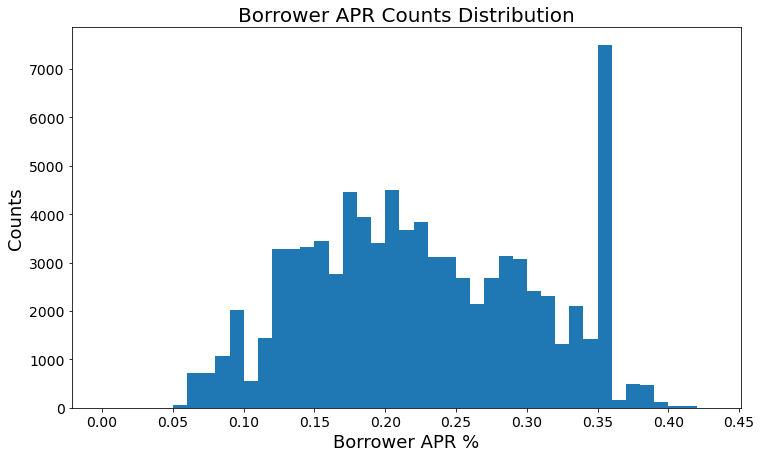

In [146]:
plt.figure(figsize=[12,7])
plt.title('Borrower APR Counts Distribution', fontsize=20)
plt.xlabel('Borrower APR %', fontsize=18)
plt.ylabel('Counts', fontsize=18)
plt.xticks(np.arange(0,max_borrowed_apr+0.05, 0.05), fontsize=14);
plt.yticks(fontsize=14)
plt.hist(data = df_loan_clean, x = 'BorrowerAPR', bins = bins);


The data looks normally distributed for the most part with few peaks.

Lets take a look at the peaks

In [147]:
df_loan_clean['BorrowerAPR'].value_counts().head().to_frame()

,BorrowerAPR
0.35797,3672
0.35643,1644
0.30532,902
0.29510,747
0.35356,721


With this we can relate to the histogram the 3 major peaks are at:
1. 0.358
2. 0.356
3. 0.305

### Original Loan Amount
Loan amount seems like an important factor, lets take a look at it

In [148]:
max_loanOriginalAmount = df_loan_clean.LoanOriginalAmount.max()
bins = np.arange(0, max_loanOriginalAmount+500, 500)

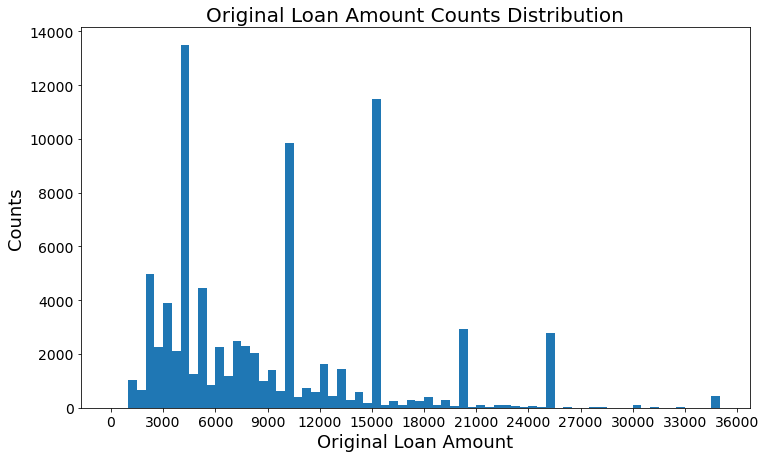

In [149]:
plt.figure(figsize=[12,7])
plt.title('Original Loan Amount Counts Distribution', fontsize=20)
plt.xlabel('Original Loan Amount', fontsize=18)
plt.ylabel('Counts', fontsize=18)
plt.xticks(np.arange(0,max_loanOriginalAmount+3000, 3000), fontsize=14);
plt.yticks(fontsize=14)
plt.hist(data = df_loan_clean, x = 'LoanOriginalAmount', bins = bins);

In [150]:
df_loan_clean['LoanOriginalAmount'].value_counts().head().to_frame()

,LoanOriginalAmount
4000,13233
15000,11460
10000,9816
2000,4591
5000,4224


Based on this data it looks like 4k, 15k and 10k loans are the most popular 

### ProsperScore
ProsperScore is an important deciding factor, let take a look at it

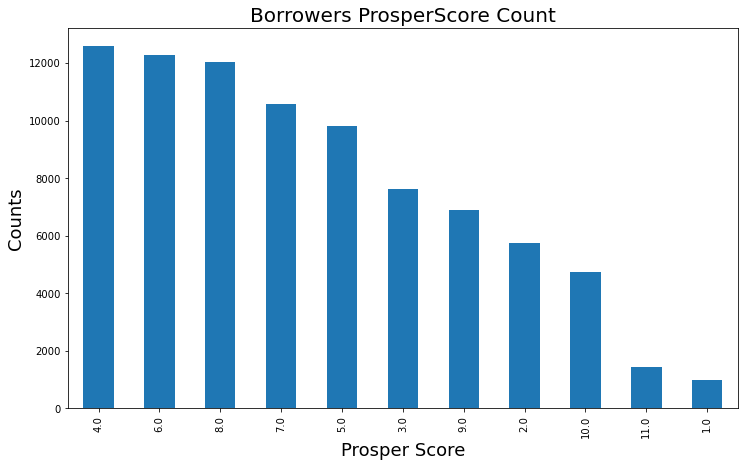

In [151]:
plt.figure(figsize=[12,7])
plt.title('Borrowers ProsperScore Count', fontsize=20)
plt.xlabel('Prosper Score', fontsize=18)
plt.ylabel('Counts', fontsize=18)
df_loan_clean['ProsperScore'].value_counts().plot(kind='bar')

Based on this we can conclude that more borrowers with low propser score were granted a loan. This could be becuase there were just more applicant with that score.

### Monthly Income

Big factor in loan origination is source of income to repay it. Let take a look at distribution of stated monthly income

In [152]:
max_income = df_loan_clean.StatedMonthlyIncome.max()
max_income

1750002.916667

In [153]:
bins = np.arange(0, 100000, 1000)

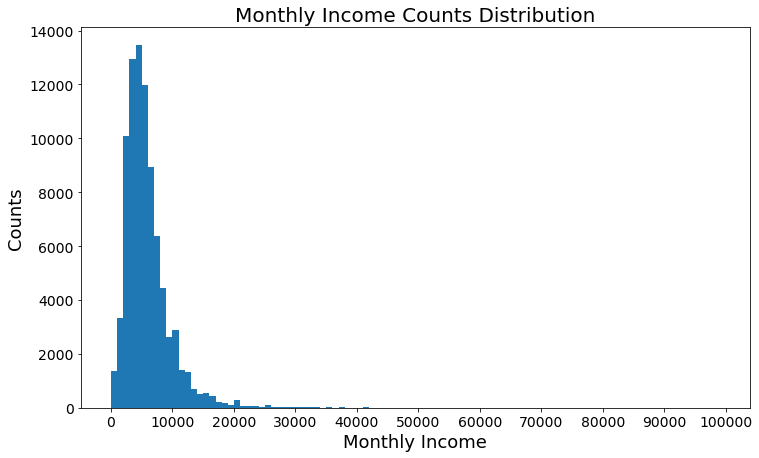

In [154]:
plt.figure(figsize=[12,7])
plt.title('Monthly Income Counts Distribution', fontsize=20)
plt.xlabel('Monthly Income', fontsize=18)
plt.ylabel('Counts', fontsize=18)
plt.xticks(np.arange(0,max_income+10000, 10000), fontsize=14);
plt.yticks(fontsize=14)
plt.hist(data = df_loan_clean, x = 'StatedMonthlyIncome', bins=bins);

Income data seems quite skewed to the right. With most applications below 30k. Lets take a closer look at that area

In [155]:
income_above_30k_count = df_loan_clean.query('StatedMonthlyIncome > 30000').shape[0]
print(f'Out of {df_loan_clean.shape[0]} only {income_above_30k_count} borrowers had income greater than 30k')
print(f'This results in {income_above_30k_count/df_loan_clean.shape[0]*100:.1f}% which is not significant and can be ignored')

Out of 84853 only 249 borrowers had income greater than 30k
This results in 0.3% which is not significant and can be ignored


We can go ahead and drop these rows 

In [156]:
df_loan_clean.query('StatedMonthlyIncome < 30000', inplace=True)

In [157]:
max_income = df_loan_clean.StatedMonthlyIncome.max()
max_income

29833.333333

In [161]:
bins = np.arange(0, max_income+1000, 1000)

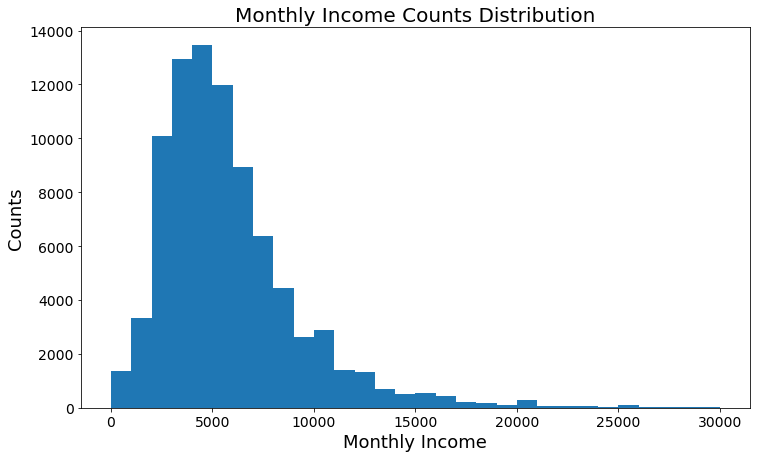

In [162]:
plt.figure(figsize=[12,7])
plt.title('Monthly Income Counts Distribution', fontsize=20)
plt.xlabel('Monthly Income', fontsize=18)
plt.ylabel('Counts', fontsize=18)
plt.xticks(np.arange(0,max_income+5000, 5000), fontsize=14);
plt.yticks(fontsize=14)
plt.hist(data = df_loan_clean, x = 'StatedMonthlyIncome', bins=bins);

### Occupation Vs APR

In [184]:
occupations_apr_mean = df_loan_clean.groupby('Occupation').BorrowerAPR.mean().sort_values(ascending=False)[:10]
print(occupations_apr_mean)

Occupation
Student - College Sophomore    0.295652
Teacher's Aide                 0.270352
Homemaker                      0.267706
Student - College Junior       0.259976
Student - College Senior       0.256170
Nurse's Aide                   0.254257
Military Enlisted              0.253610
Student - College Freshman     0.253228
Waiter/Waitress                0.253215
Food Service                   0.250675
Name: BorrowerAPR, dtype: float64


In [186]:
occupations_apr_mean[0] - occupations_apr_mean[-1]

0.04497680928912867

<BarContainer object of 10 artists>

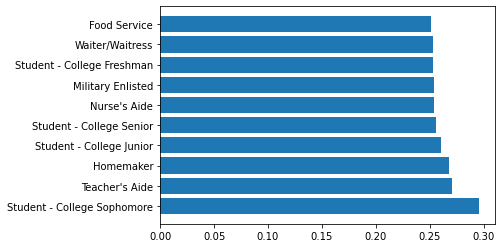

In [185]:
# bar plot for APR means for each top 10 occupations.
plt.barh(occupations_apr_mean.index, occupations_apr_mean)

It is interesting to find out that the borrower APR is more or less the same accross all occupatons. Hence its is not as relevant.

### Credit Score

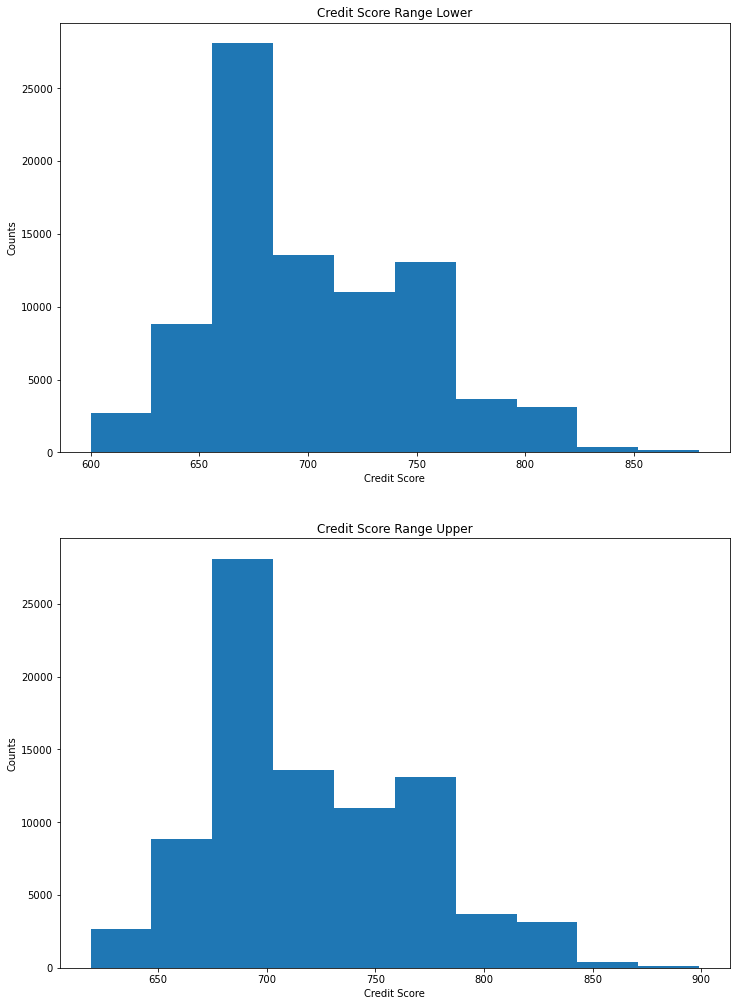

In [213]:
fig = plt.figure(figsize=(12,7))
ax1 = plt.subplot(211, title='Credit Score Range Lower', xlabel='Credit Score', ylabel='Counts')
ax2 = plt.subplot(212, title='Credit Score Range Upper', xlabel='Credit Score', ylabel='Counts')
ax1.hist(data = df_loan_clean, x = 'CreditScoreRangeLower');
plt.subplots_adjust(top=2)
ax2.hist(data = df_loan_clean, x = 'CreditScoreRangeUpper');
plt.subplots_adjust(top=2)

The two histogram show very similar data distribution with not many outliers. 

## Categories

Looking at the categorical variables

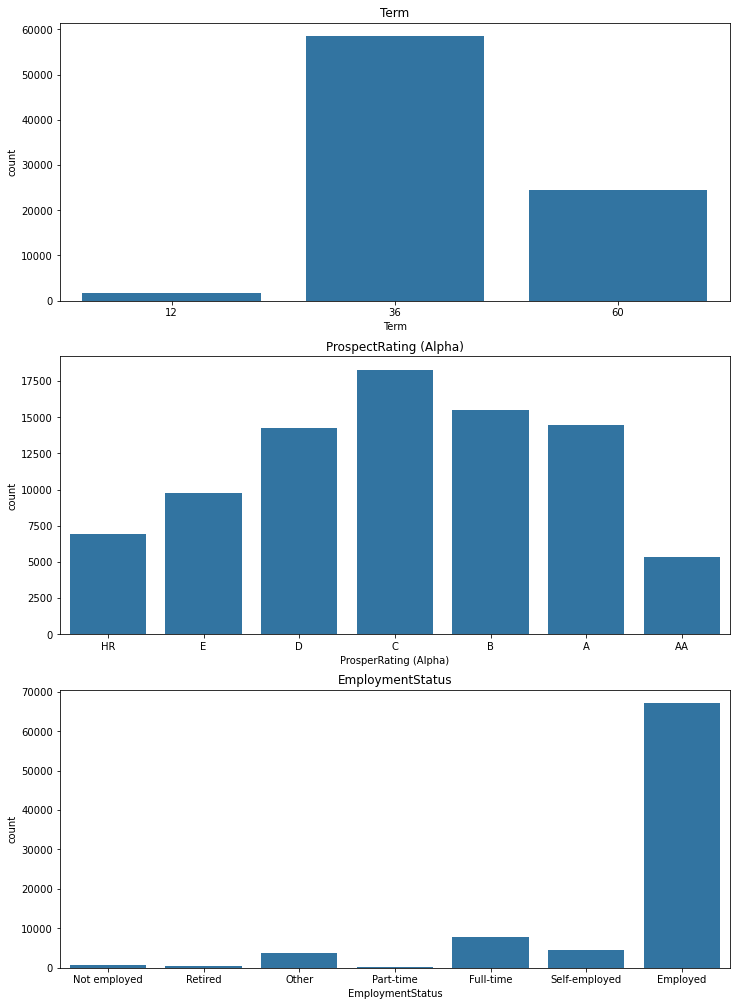

In [297]:
fig = plt.figure(figsize=(12,7))
ax1 = plt.subplot(311, title='Term', xlabel='Term', ylabel='Counts')
ax2 = plt.subplot(312, title='ProspectRating (Alpha)', xlabel='Prospect Rating (Alpha)', ylabel='Counts')
ax3 = plt.subplot(313, title='EmploymentStatus', xlabel='Employment Status', ylabel='Counts')
sb.countplot(data = df_loan_clean, x = 'Term', color = sb.color_palette()[0], ax = ax1)
sb.countplot(data = df_loan_clean, x = 'ProsperRating (Alpha)', color = sb.color_palette()[0], ax = ax2)
sb.countplot(data = df_loan_clean, x = 'EmploymentStatus', color = sb.color_palette()[0], ax = ax3);
plt.subplots_adjust(top=2)

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

My variable of interest was Borrowers APR and it is normally distributed for the most part. I did observe few sharp peaks with most values between 0.05 and 0.4. Transformation was not required for this feature.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Stated monthly income is skewed to the right and most applicants were found to have income below 30k and the 0.3% that were above were considered outliers and removed for the purpose of this analysis

Three variables were converted to categorical data type for the ease of vsiaulization as well as anaylsis based on them. 

## Bivariate Exploration

Correlation Plot: Pairwise correlations present between selected features

In [216]:
num_vars = ['LoanOriginalAmount', 'BorrowerAPR', 'StatedMonthlyIncome','AvailableBankcardCredit']

We start with the categorical data first

In [ ]:
# First lets create a categorical type


Text(0.5, 1.0, 'Correlation Plot')

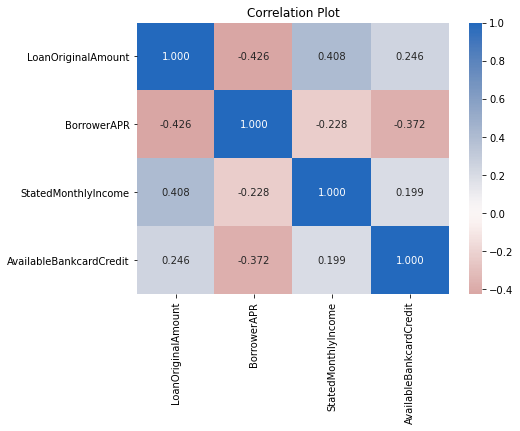

In [226]:
plt.figure(figsize = [7, 5])
sb.heatmap(df_loan_clean[num_vars].corr(), 
           annot = True, 
           fmt = '.3f', 
           cmap = 'vlag_r', 
           center = 0);
plt.title('Correlation Plot')

The correlation plot shows that there is no strong relationship between any of the features tested.

Next we can compare the feautres in a scatter plot of pairs of selected features. This will be done on a sample of the data

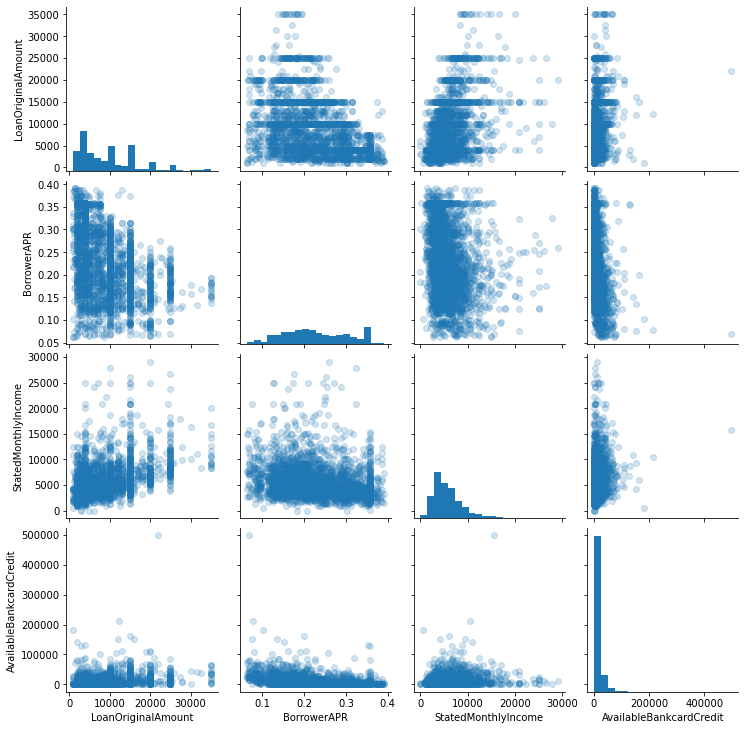

In [228]:
df_sample = df_loan_clean.sample(3000)
g = sb.PairGrid(data = df_sample.dropna(), vars = num_vars)
g = g.map_diag(plt.hist, bins=20)
g.map_offdiag(plt.scatter, alpha=0.2); #adding transperency 

We observe similar trends in the scatter plot as we did in the correlation matrix. For example StatedMonthlyIncome and LoanOriginalAmount has a positive relationship of 0.408 and this can be seen in the scatter plot, which shows a positive trend.  

### Proseper Score Vs Borrower APR

In [232]:
max_borrower_apr = df_loan_clean['BorrowerAPR'].max()
max_prosper_score = df_loan_clean['ProsperScore'].max()
bins_borrowerApr = np.arange(0, max_borrower_apr + 0.05, 0.05)
bins_prosper_score = np.arange(0, max_prosper_score + 1, 1)

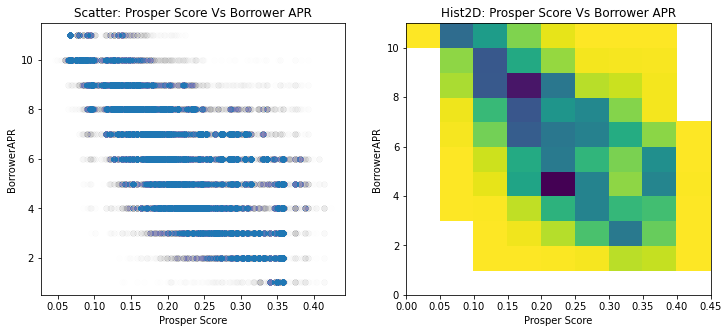

In [235]:
fig = plt.figure(figsize=(12,5))
ax1 = plt.subplot(121, title='Scatter: Prosper Score Vs Borrower APR', xlabel='Prosper Score', ylabel='BorrowerAPR')
ax2 = plt.subplot(122, title='Hist2D: Prosper Score Vs Borrower APR', xlabel='Prosper Score', ylabel='BorrowerAPR')

ax1.scatter(data = df_loan_clean, x = 'BorrowerAPR', y = 'ProsperScore', alpha = 0.005);
ax2.hist2d( data = df_loan_clean, 
            x= 'BorrowerAPR', 
            y = 'ProsperScore', 
            bins=[bins_borrowerApr, bins_prosper_score],
            cmap = 'viridis_r', 
            cmin = 0.5);

Here we see a negative trend, higher the prosper score, lower the borrower APR. This makes sense as a higher prosper score would generally mean more reliable to payback the loan.

### Borrower APR Vs StatedMonthlyincome Vs LoanOriginalAmount

In [298]:
num_vars = ['LoanOriginalAmount', 'BorrowerAPR', 'StatedMonthlyIncome']
cat_vars = ['Term', 'ProsperRating (Alpha)', 'EmploymentStatus']

<Figure size 864x864 with 0 Axes>

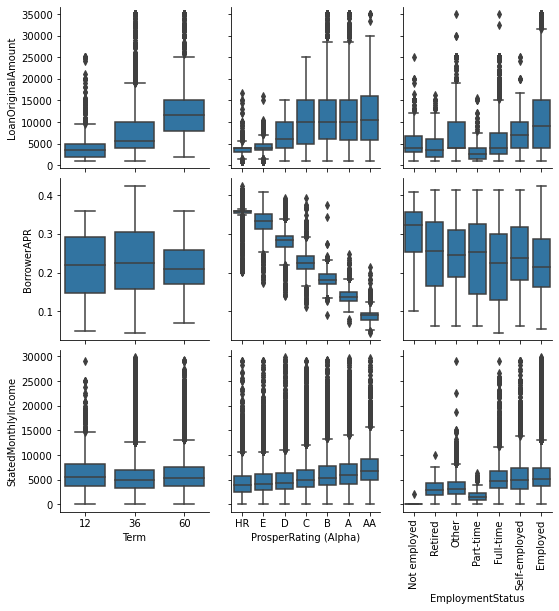

In [299]:
def plotBoxGrid(x, y, **kwargs):
    sb.boxplot(x, y, color = sb.color_palette()[0])

plt.figure(figsize=(12,12))
g = sb.PairGrid(data = df_loan_clean, x_vars = cat_vars, y_vars = num_vars) 
g.map(plotBoxGrid);
plt.xticks(rotation=90);

There are some distinctive trends observed here:
-	Loan amount increases as the term for loan increases
-	There is a positive relationship between Borrower APR and Prosper Rating. You can see that the APR is low with better rating.
-	Lower APR was seen by employment status: Employed, Full-time and Self-Employed


### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

The primary observation was that most features have a negetive relationship with Borrowers APR, further no stron relationship was found between the selected features. 

Strong relationship was found between Prosper Score and Borrowers APR. As the score increased the APR went down, this was expected as the applicants were primarily judged based on this score. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Between the other features it was observed that increase in term of the loan resulted in larger loan amounts and strong positive relationship between Prosper rating and Borrowers APR. Finally, employment status seems to play a major role as well.

## Multivariate Exploration

### Prospect Rating Vs BorrowerAPR & LoanOriginalAmount

<Figure size 864x864 with 0 Axes>

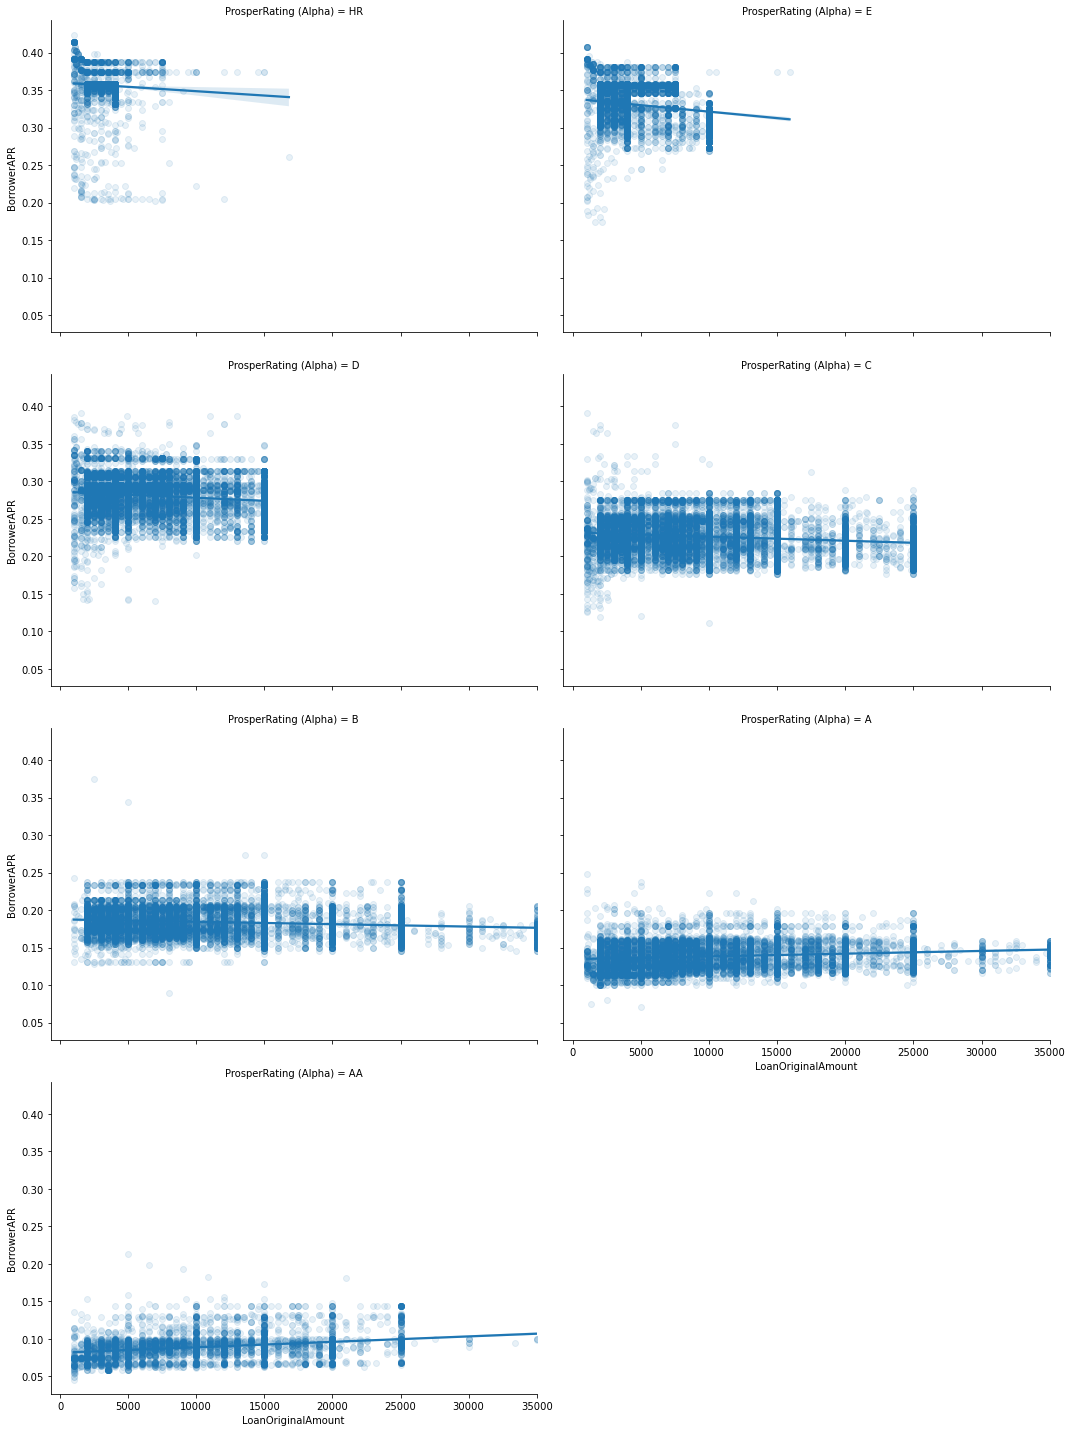

In [300]:
plt.figure(figsize=(12,12))
g=sb.FacetGrid(data=df_loan_clean, col='ProsperRating (Alpha)', aspect=1.5, height=5, col_wrap=2)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.04, scatter_kws={'alpha':0.1});

Within each rating cateogry there doesnt seem to be much variation in APR as the loan amount increases. But the overall APR does change as prospect rating changes. We do see that people with better rating tend to choose larger loans

### BorrowerAPR Vs Credit Score & Prosper Score

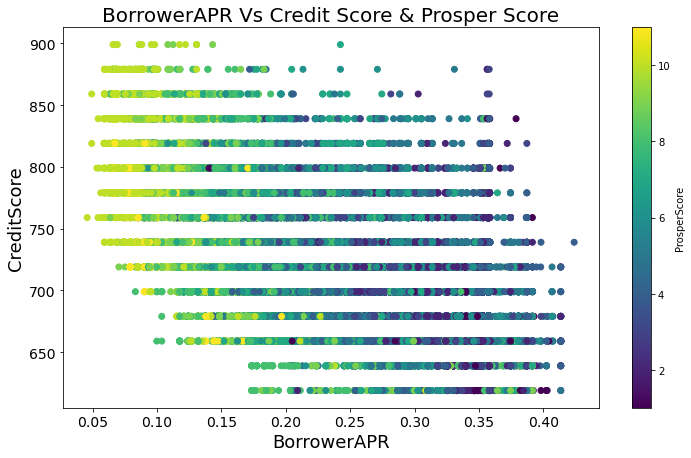

In [301]:
plt.figure(figsize=[12,7])
plt.title('BorrowerAPR Vs Credit Score & Prosper Score', fontsize=20)
plt.xlabel('BorrowerAPR', fontsize=18)
plt.ylabel('CreditScore', fontsize=18)
plt.xticks(fontsize=14);
plt.yticks(fontsize=14)
plt.scatter(data = df_loan_clean, x = 'BorrowerAPR', y='CreditScoreRangeUpper', c = 'ProsperScore');
plt.colorbar(label = 'ProsperScore')

Overall a negative trend is observed between Borrower APR and credit score. From the visualization we can see that for scores below 700, there are very few points below an APR of 0.20. We also see that the darker coloring of each point, referring to lower prosper score all lie near higher BorrowerAPR

### Effects of Term on Loan Original Amount and Prosper Rating

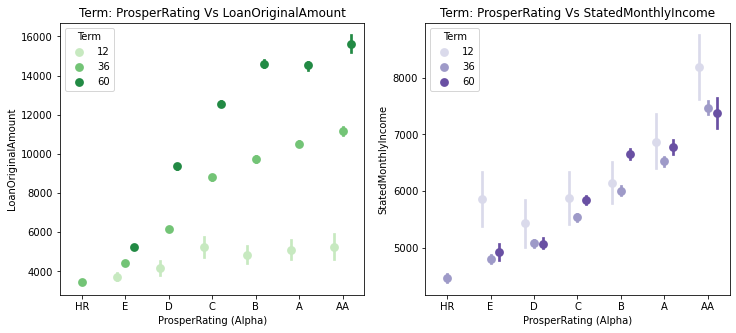

In [302]:
fig = plt.figure(figsize=(12,5))
ax1 = plt.subplot(121, title='Term: ProsperRating Vs LoanOriginalAmount', xlabel='ProsperRating', ylabel='StatedMonthlyIncome')
ax2 = plt.subplot(122, title='Term: ProsperRating Vs StatedMonthlyIncome', xlabel='ProsperRating', ylabel='LoanOriginalAmount')
sb.pointplot(data = df_loan_clean, x = 'ProsperRating (Alpha)', y = 'LoanOriginalAmount', hue = 'Term',
           palette = 'Greens', linestyles = '', dodge = 0.4, ax=ax1);
sb.pointplot(data = df_loan_clean, x = 'ProsperRating (Alpha)', y = 'StatedMonthlyIncome', hue = 'Term',
           palette = 'Purples', linestyles = '', dodge = 0.4, ax=ax2);



We can see here that for the most part longer terms end up being in larger loan amounts. So as the loan amunt increases the term increases too. which makes sense as most people dont want to pay a large amount monthly so increase in amount usually causes increase in loan term.

There doesnt seem to be a relation between term and stated monthly income. We do see that as the rating increases the monthly income increases too.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

When comparing Borrowed APR to loan amount under differnt propser rating categories, it was observed that most relationships are negative in lower rating category and there was a slight upward trend with higher rating categories.

Borrower APR had quite a strong relationship when compared with a combination of Credit Score and Prosper Score. it solidifies our claim that higher prosper score usually consists of applicants with higher credict score and those are the ones who receive a lower Borrower APR.

Finally, we confirmed our assumption that usually longer loan terms come along with larger loan amounts. Bery few applicants opt for shorter term and larger loan amount.
